In [1]:
## Notebook env: mirtud_env (mirtud_env kernel)
### This notebook analyzes how well the model in MAVE_trial.ipynb (and MAVE_trial.nbconvert.ipynb)
## learned the data by analyzing the pearson Rs for each cell between inputted raw data and 
## MAVE reconstructed output data
### The notebook also looks at stabilization of loss functions 
##loss_scalers = [100, 1, 0.1, 100]

%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(stringr)
library(tidyr)
library(ggpointdensity)

In [8]:
%%R
Loss <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/logs/R100_K0.001_C0.1_T0.01_training.log.2022-12-17_16034013.433604', sep ='\t')
colnames(Loss)[2] <- 'Total_Loss'
Loss$Recon_Loss <- str_sub(Loss$Recon_Loss, start = 8, end = 17)
Loss$KLD_Loss <- str_sub(Loss$KLD_Loss, start = 8, end = 13)
Loss$Classification_Loss <- str_sub(Loss$Classification_Loss, start = 8, end = 13)
Loss$Triplet_Loss <- str_sub(Loss$Triplet_Loss, start = 8, end = 13)
Loss[,3:6] <- apply(Loss[,3:6], 2, as.numeric)
Loss$Recon_Loss[14] <- 22315


Loss$Recon_Loss <- Loss$Recon_Loss/max(Loss$Recon_Loss)
Loss$KLD_Loss <- Loss$KLD_Loss/max(Loss$KLD_Loss)
Loss$Classification_Loss <- Loss$Classification_Loss/max(Loss$Classification_Loss)
Loss$Triplet_Loss <- Loss$Triplet_Loss/max(Loss$Triplet_Loss)


Individual_losses <- pivot_longer(Loss, cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')


In [9]:
%%R
Loss

    Epoch Total_Loss Recon_Loss    KLD_Loss Classification_Loss Triplet_Loss
1       0   945.2939  0.8818206 0.032632314           0.9908592    0.3072709
2       1 13683.4219  1.0000000 1.000000000           0.9863467    1.0000000
3       2  2060.1797  0.7553077 0.118159243           0.9875037    0.5101062
4       3  3260.4072  0.7021973 0.215815614           0.9961321    0.3962918
5       4  5663.0474  0.6975539 0.397291634           1.0000000    0.6003033
6       5  5483.7002  0.6650072 0.385038026           0.9972065    0.5760052
7       6  4593.6963  0.6124942 0.321395313           0.9920163    0.4280806
8       7  4204.8521  0.5897986 0.294094366           0.9861318    0.3434859
9       8  4353.2271  0.5981663 0.304547571           0.9840160    0.3756461
10      9  3949.3052  0.6028764 0.272186869           0.9824953    0.4104374
11     10  2681.9817  0.5884115 0.175003880           0.9821316    0.3824249
12     11  1464.2156  0.5623409 0.082609033           0.9834705    0.3316928

9              0 2022-12-17 16:38:49.239897
10             0 2022-12-17 16:39:14.839403
11             0 2022-12-17 16:39:42.281741
12             0 2022-12-17 16:40:07.505593
13             0 2022-12-17 16:40:33.013601
14             0 2022-12-17 16:41:02.461338
15             0 2022-12-17 16:41:31.560488
16             0 2022-12-17 16:41:59.961456
17             0 2022-12-17 16:42:29.283236
18             0 2022-12-17 16:43:02.408926
19             0 2022-12-17 16:43:29.330198
20             0 2022-12-17 16:44:05.914586
21             0 2022-12-17 16:44:30.743359
22             0 2022-12-17 16:45:02.966852
23             0 2022-12-17 16:45:31.165840
24             0 2022-12-17 16:45:59.165848
25             0 2022-12-17 16:46:27.100565
26             0 2022-12-17 16:46:51.898025
27             0 2022-12-17 16:47:18.074783
28             0 2022-12-17 16:47:44.855175
29             0 2022-12-17 16:48:13.505063
30             0 2022-12-17 16:48:40.469967
31             0 2022-12-17 16:4

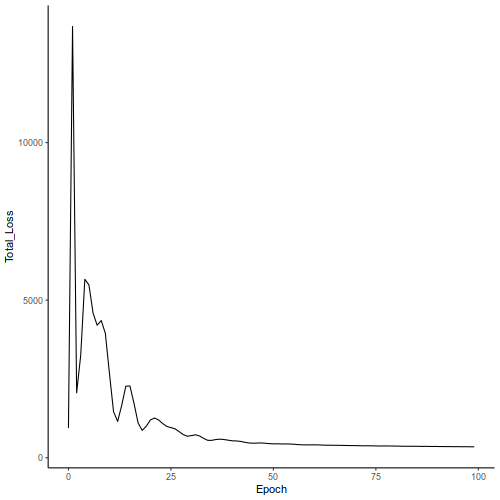

In [10]:
%%R -h 500 -w 500
Total_loss_plot <- ggplot(Loss, aes(Epoch, Total_Loss)) + geom_path() + theme_classic()
Total_loss_plot

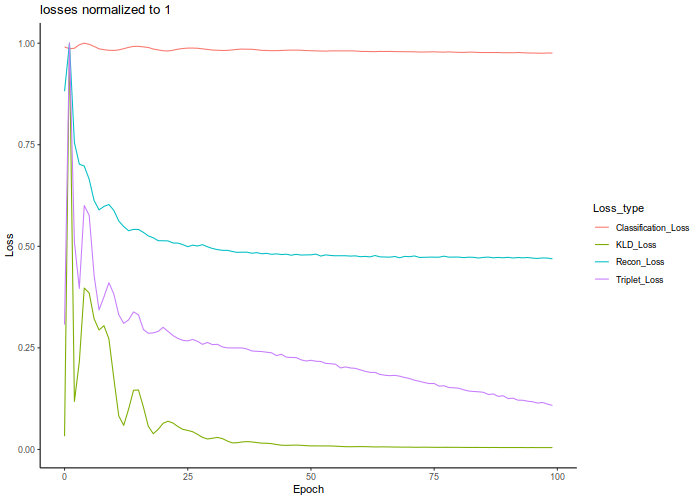

In [11]:
%%R -h 500 -w 700
Individual_loss_plot <- ggplot(Individual_losses, aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle("losses normalized to 1")
Individual_loss_plot

In [12]:
%%R
Rs <- read.csv('/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T0.01_R_tbl.csv')

epoch_1 = as.numeric(Rs[1,])
epoch_50 = as.numeric(Rs[50,])
epoch_100 = as.numeric(Rs[100,])

df <- data.frame(epoch_1, epoch_50, epoch_100)
df <- pivot_longer(df, cols = 1:3, names_to = 'Epoch', values_to = 'Rs')

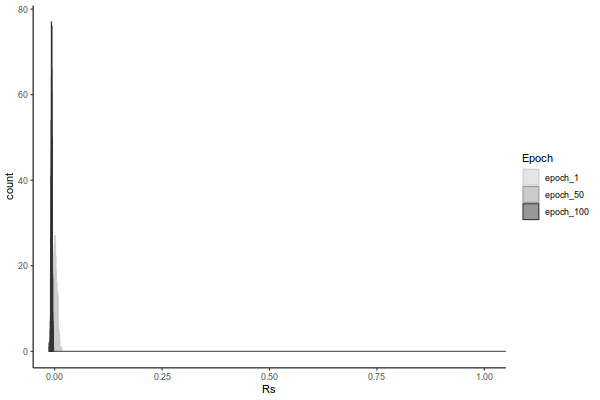

In [13]:
%%R -h 400 -w 600
df$Epoch <- factor(df$Epoch, levels = c('epoch_1', 'epoch_50', 'epoch_100'))
R_learning <- ggplot(df, aes(x=Rs, fill=Epoch, color=Epoch)) +
geom_histogram(position="identity", alpha=0.5, bins = 200000) + scale_color_grey(start = 0.8, end = 0.2) +
scale_fill_grey(start = 0.8, end = 0.2) +
theme_classic() + coord_cartesian(xlim = c(0,1))
R_learning

In [14]:
%%R
medians <- matrixStats::rowMedians(as.matrix(Rs))
Loss$medians <- medians

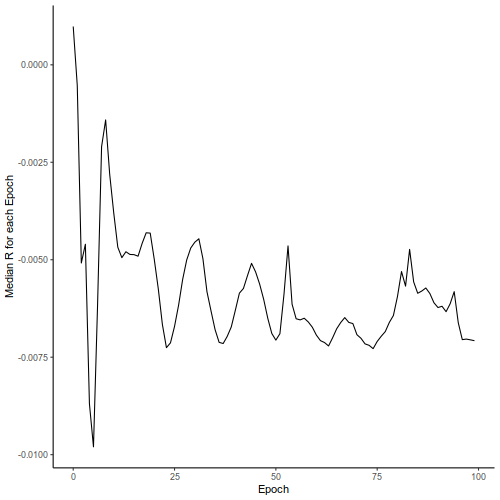

In [15]:
%%R -h 500 -w 500
R_median_plot <-ggplot(Loss, aes(Epoch, medians)) + geom_path() + ylab('Median R for each Epoch') + theme_classic()
R_median_plot

In [16]:
%%R
UMAP_output <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T0.01_UMAP-OF-MU.tsv.gz", sep = '\t', row.names = 1)
head(UMAP_output)

                            UMAP1     UMAP2           guide
miR_2:AGGTAGGCAAATCAAG-1 3.115637 10.893390  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1 7.046501  8.875448       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1 2.329065  5.053608 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1 1.640192  8.847058  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1 1.079873  8.317557     hsa-miR-429
miR_1:AAGACAACAACCTAAC-1 2.741823  7.932861   hsa-miR-17-3p


In [17]:
%%R
library(dplyr)
MAVE_latent_2dims <- read.csv("/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/R100_K0.001_C0.1_T0.01_scMAVE_mu-matrix.tsv.gz", sep = '\t', row.names = 1)
MAVE_latent_2dims <- select(MAVE_latent_2dims, LV.mu.0, LV.mu.1)
MAVE_latent_2dims$guide <- UMAP_output$guide
head(MAVE_latent_2dims)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                             LV.mu.0      LV.mu.1           guide
miR_2:AGGTAGGCAAATCAAG-1  0.06557506  0.228745371  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1 -0.18706506 -0.235942543       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1 -0.34798425  0.191935584 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1  0.34985679 -0.007647812  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1  0.21005473 -0.095430136     hsa-miR-429
miR_1:AAGACAACAACCTAAC-1  0.14583978 -0.020148650   hsa-miR-17-3p


In [18]:
%%R
guides = unique(MAVE_latent_2dims$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(MAVE_latent_2dims), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = MAVE_latent_2dims$guide == guides[i]
    vec = MAVE_latent_2dims$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
MAVE_latent_2dims = cbind(MAVE_latent_2dims, tmp_df)

In [19]:
%%R
guides = unique(UMAP_output$guide)
tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output), ncol = length(guides)))
colnames(tmp_df) = guides
for (i in 1:length(guides)){
    guide_cells = UMAP_output$guide == guides[i]
    vec = UMAP_output$guide
    vec[guide_cells] = 'Guide'
    vec[!guide_cells] = 'N/A'
    tmp_df[,i] <- vec
}
UMAP_output_2dims = cbind(UMAP_output, tmp_df)

In [20]:
%%R
print(paste(nrow(MAVE_latent_2dims), 'rows'))
print(paste(ncol(MAVE_latent_2dims), 'columns'))
head(MAVE_latent_2dims[, 1:5])

[1] "500 rows"
[1] "268 columns"
                             LV.mu.0      LV.mu.1           guide
miR_2:AGGTAGGCAAATCAAG-1  0.06557506  0.228745371  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1 -0.18706506 -0.235942543       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1 -0.34798425  0.191935584 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1  0.34985679 -0.007647812  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1  0.21005473 -0.095430136     hsa-miR-429
miR_1:AAGACAACAACCTAAC-1  0.14583978 -0.020148650   hsa-miR-17-3p
                         hsa-miR-522-3p TuD_NC_01
miR_2:AGGTAGGCAAATCAAG-1          Guide       N/A
miR_2:GAAACCTAGACCAAGC-1            N/A     Guide
miR_3:ATACCTTCATGACCCG-1            N/A       N/A
miR_3:GTCAGCGTCCCTCGAT-1            N/A       N/A
miR_1:GAGGCCTCACTTGAGT-1            N/A       N/A
miR_1:AAGACAACAACCTAAC-1            N/A       N/A


In [21]:
%%R
UMAP_output[1:5,c(1,2)]

                            UMAP1     UMAP2
miR_2:AGGTAGGCAAATCAAG-1 3.115637 10.893390
miR_2:GAAACCTAGACCAAGC-1 7.046501  8.875448
miR_3:ATACCTTCATGACCCG-1 2.329065  5.053608
miR_3:GTCAGCGTCCCTCGAT-1 1.640192  8.847058
miR_1:GAGGCCTCACTTGAGT-1 1.079873  8.317557


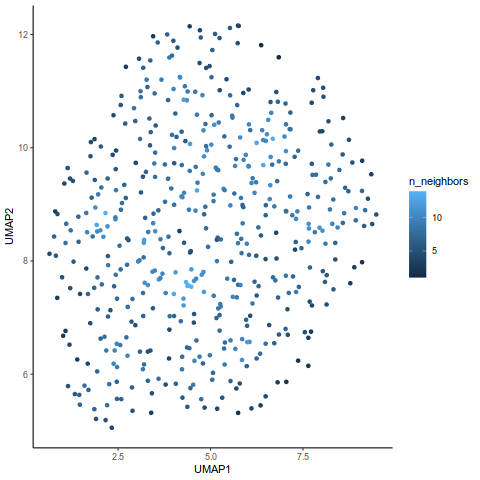

In [22]:
%%R
## density plot of cells plotted in UMAP1/UMAP2 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(UMAP_output, aes(UMAP1, UMAP2)) + geom_pointdensity() + theme_classic() +
xlab('UMAP1') + ylab('UMAP2')

In [23]:
%%R
MAVE_latent_2dims[1:5,1:5]

                             LV.mu.0      LV.mu.1           guide
miR_2:AGGTAGGCAAATCAAG-1  0.06557506  0.228745371  hsa-miR-522-3p
miR_2:GAAACCTAGACCAAGC-1 -0.18706506 -0.235942543       TuD_NC_01
miR_3:ATACCTTCATGACCCG-1 -0.34798425  0.191935584 hsa-miR-130b-3p
miR_3:GTCAGCGTCCCTCGAT-1  0.34985679 -0.007647812  hsa-miR-625-3p
miR_1:GAGGCCTCACTTGAGT-1  0.21005473 -0.095430136     hsa-miR-429
                         hsa-miR-522-3p TuD_NC_01
miR_2:AGGTAGGCAAATCAAG-1          Guide       N/A
miR_2:GAAACCTAGACCAAGC-1            N/A     Guide
miR_3:ATACCTTCATGACCCG-1            N/A       N/A
miR_3:GTCAGCGTCCCTCGAT-1            N/A       N/A
miR_1:GAGGCCTCACTTGAGT-1            N/A       N/A


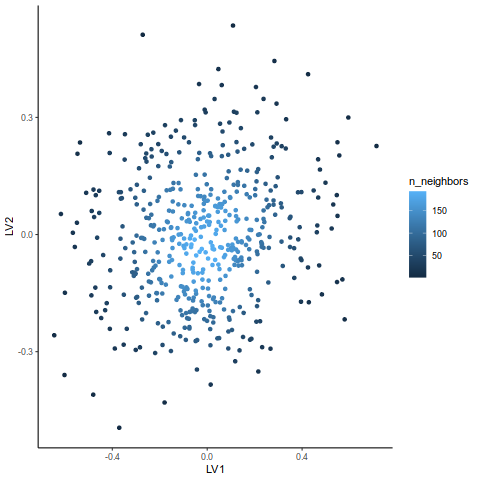

In [24]:
%%R
## density plot of cells plotted in LV.mu.0/LV.mu.1 space
library(ggplot2)
library(ggpointdensity)
library(stringr)
ggplot(MAVE_latent_2dims[,c(1,2)], aes(LV.mu.0, LV.mu.1)) + geom_pointdensity() + theme_classic() +
xlab('LV1') + ylab('LV2')


In [25]:
%%R
plts <- list()
for (i in 1:length(1:length(guides))){
    tmp <- MAVE_latent_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    } else {
        plts[[i]] <- ggplot(tmp, aes(LV.mu.0, LV.mu.1, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('LV1') + ylab('LV2')
    }
}


In [26]:
%%R
plts2 <- list()
for (i in 1:length(1:length(guides))){
    tmp <- UMAP_output_2dims[,c(1,2,(i+3))]
    colnames(tmp)[3] <- 'Type'
    tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
    if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    } else {
        plts2[[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point() + 
        theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
        ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
    }
}


In [27]:
%%R
library(ggpubr)
umap_plts <- rep(list('empty'), ceiling(length(plts2)/25))
for (i in 1:ceiling(length(plts2)/25)){
    umap_plts[[i]] <- ggarrange(plotlist = plts2[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

In [28]:
%%R
library(ggpubr)
latent_plts <- rep(list('empty'), ceiling(length(plts)/25))
for (i in 1:ceiling(length(plts)/25)){
    latent_plts[[i]] <- ggarrange(plotlist = plts[(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
}

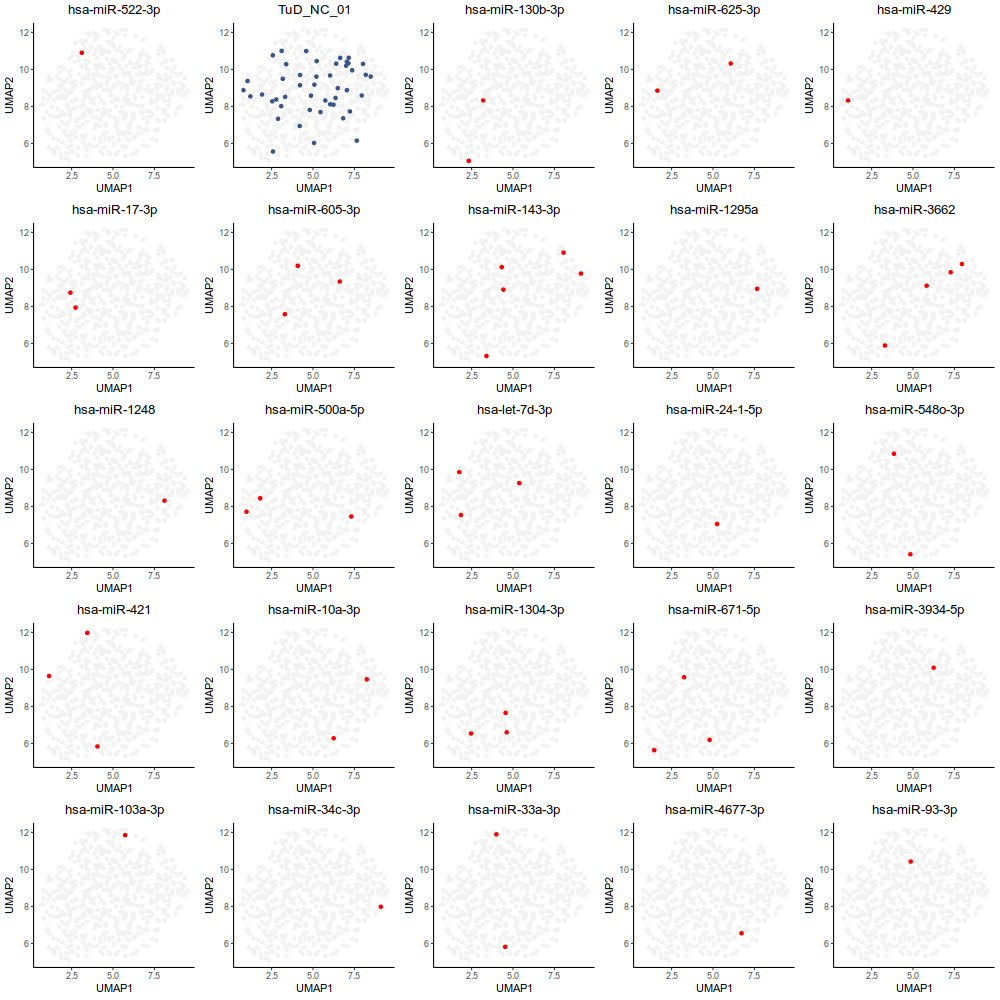

In [29]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
umap_plts[[1]]

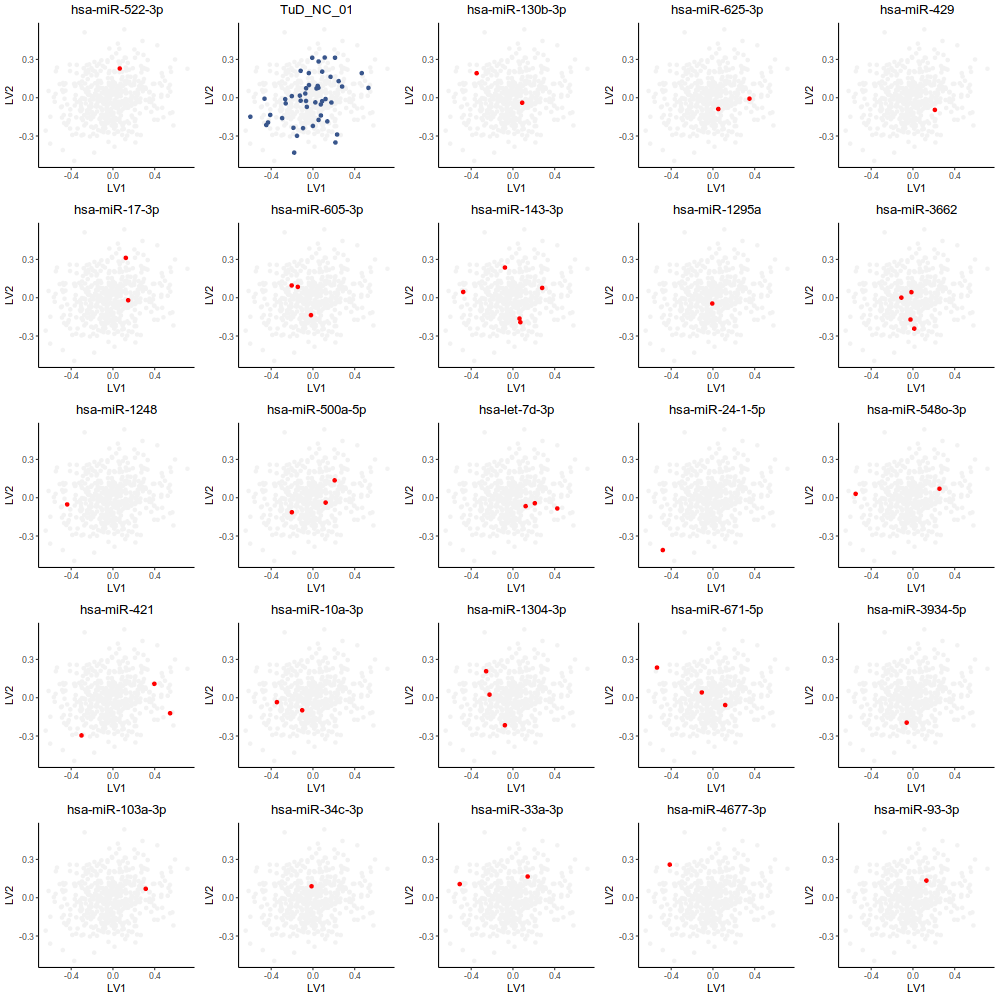

In [30]:
%%R -w 1000 -h 1000
## non-targeting control guides are blue and targeting guides are red
latent_plts[[1]]